In [ ]:
import pandas as pd

#Loading dataset
wine = pd.read_csv('../input/goormcompetition/winequality-red.csv')
wine_test = pd.read_csv('../input/goormcompetition/winequality-red_test.csv')

In [ ]:
#Let's check how the data is distributed
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Quality 상관분석 (Heatmap)

<AxesSubplot:>

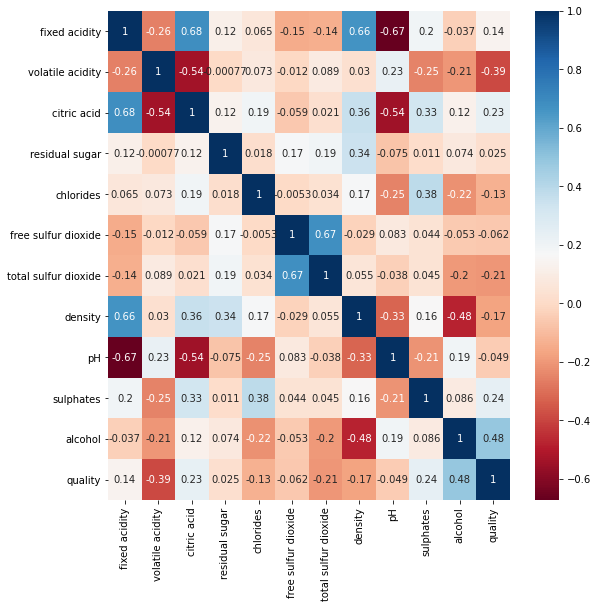

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 9))
corr = wine.corr()
sns.heatmap(corr, cmap='RdBu',annot=True)

In [ ]:
#correlated features with quality
cor_feat = abs(corr["quality"])

#relevant features
rel_feat = cor_feat[cor_feat>0.15]
rel_feat

volatile acidity        0.390371
citric acid             0.230955
total sulfur dioxide    0.205163
density                 0.172812
sulphates               0.241983
alcohol                 0.484927
quality                 1.000000
Name: quality, dtype: float64

In [ ]:
rel_feat.index

Index(['volatile acidity', 'citric acid', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
# 상관도가 낮은 변수 제거
for i in wine.columns:
    if i == "quality":
        continue
    if i not in rel_feat.index:
        wine = wine.drop(i, axis = 1)
        wine_test = wine_test.drop(i, axis = 1)


In [ ]:
wine.head()

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.70,0.00,34.0,0.9978,0.56,9.4,5
1,0.88,0.00,67.0,0.9968,0.68,9.8,5
2,0.76,0.04,54.0,0.9970,0.65,9.8,5
3,0.28,0.56,60.0,0.9980,0.58,9.8,6
4,0.70,0.00,34.0,0.9978,0.56,9.4,5


In [ ]:
wine_test.head()

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol
0,0.670,0.02,92,0.99566,0.68,11.066667
1,0.370,0.32,28,0.99470,0.73,11.300000
2,0.785,0.19,98,0.99713,0.52,9.566667
3,0.630,0.02,30,0.99712,0.75,9.800000
4,0.580,0.20,22,0.99322,0.49,11.700000


# 이상치 제거

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

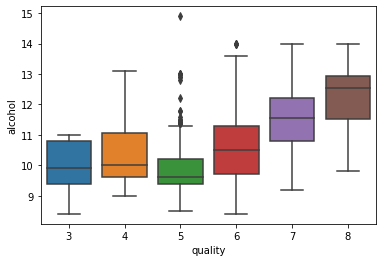

In [ ]:
# alchohol의 5점 6점에 점으로 표시된 이상치 확인 가능

sns.boxplot(x='quality', y='alcohol', data = wine)

In [ ]:
# colname 리스트 안에 적절한 컬럼명 추가

import numpy as np
for colname in ["volatile acidity","alcohol","sulphates"]:
    for i in wine['quality'].unique():
        target = wine[wine['quality']==i][colname]
        quantile_25 = np.percentile(target.values, 25)
        quantile_75 = np.percentile(target.values, 75)
        # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
        iqr = quantile_75 - quantile_25
        iqr_weight = iqr * 1.5
        lowest_val = quantile_25 - iqr_weight
        highest_val = quantile_75 + iqr_weight
        # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
        outlier_index = target[(target < lowest_val) | (target > highest_val)].index
        wine.drop(outlier_index, axis=0, inplace=True)

In [1]:
"""target = wine[wine['quality']==6]["alcohol"]
quantile_25 = np.percentile(target.values, 25)
quantile_75 = np.percentile(target.values, 75)
# IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
iqr = quantile_75 - quantile_25
iqr_weight = iqr * 1.5
lowest_val = quantile_25 - iqr_weight
highest_val = quantile_75 + iqr_weight
# 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
outlier_index = target[(target < lowest_val) | (target > highest_val)].index
wine.drop(outlier_index, axis=0, inplace=True)
"""

SyntaxError: ignored

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

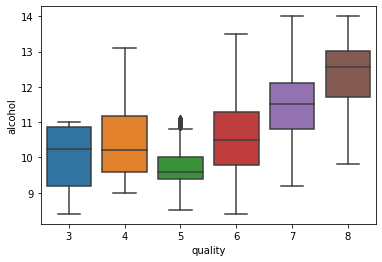

In [ ]:
# 이상치 제거 확인
sns.boxplot(x='quality', y='alcohol', data = wine)

# quality에 1,0 레이블 달기 / 데이터셋 나누기 등

In [ ]:
bins = (0, 5, 10)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()
#Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])
#Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']


In [ ]:
# splitting the dataset
# train : val= 9 : 1

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state = 42, shuffle=False)

In [ ]:
X_train

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol
0,0.700,0.00,34.0,0.99780,0.56,9.4
1,0.880,0.00,67.0,0.99680,0.68,9.8
2,0.760,0.04,54.0,0.99700,0.65,9.8
3,0.280,0.56,60.0,0.99800,0.58,9.8
4,0.700,0.00,34.0,0.99780,0.56,9.4
...,...,...,...,...,...,...
1286,0.160,0.44,31.0,0.99328,0.54,12.4
1290,0.740,0.00,12.0,0.99521,0.59,11.0
1291,0.635,0.10,60.0,0.99638,0.75,10.9
1292,0.395,0.13,28.0,0.99362,0.67,12.4


In [ ]:
X_val

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol
1294,0.635,0.10,60.0,0.99638,0.75,10.9
1295,0.630,0.00,77.5,0.99558,0.45,9.5
1296,0.630,0.00,77.5,0.99558,0.45,9.5
1297,0.530,0.14,29.0,0.99323,0.61,12.1
1298,0.600,0.00,18.0,0.99191,0.56,12.2
...,...,...,...,...,...,...
1434,0.540,0.37,95.0,1.00369,0.77,9.0
1435,0.540,0.37,95.0,1.00369,0.77,9.0
1436,0.380,0.38,90.0,0.99914,0.65,8.5
1437,0.915,0.29,39.0,0.99577,0.54,11.1


In [ ]:
!pip install autograd
from autograd import numpy
from autograd import grad
from matplotlib import pyplot

  Created wheel for autograd: filename=autograd-1.3-py3-none-any.whl size=47989 sha256=fbfbb3c7c7c223e0f41f17f2c5465427711a412adf515eef18eed8602094e79a
  Stored in directory: /root/.cache/pip/wheels/ef/32/31/0e87227cd0ca1d99ad51fbe4b54c6fa02afccf7e483d045e04
Successfully built autograd


In [ ]:
import numpy
# calculate mu and sigma
mu = numpy.mean(X_train, axis=0)
sigma = numpy.std(X_train, axis=0)

# normalize the training, validation, and test datasets
X_train = (X_train - mu) / sigma
X_val = (X_val - mu) / sigma
X_test = (wine_test - mu) / sigma

X_train = X_train.to_numpy()
X_val = X_val.to_numpy()
X_test = X_test.to_numpy()

In [ ]:
def logistic(x):
    """Logistic/sigmoid function.
    
    Arguments
    ---------
    x : numpy.ndarray
        The input to the logistic function.
    
    Returns
    -------
    numpy.ndarray
        The output.
        
    Notes
    -----
    The function does not restrict the shape of the input array. The output
    has the same shape as the input.
    """
    return 1. / (1. + numpy.exp(-x))

def logistic_model(x, params):
    """A logistic regression model.
    
    A a logistic regression is y = sigmoid(x * w + b), where the operator *
    denotes a mat-vec multiplication.
    
    Arguments
    ---------
    x : numpy.ndarray
        The input of the model. The shape should be (n_images, n_total_pixels).
    params : a tuple/list of two elemets
        The first element is a 1D array with shape (n_total_pixels). The
        second element is a scalar (the intercept)

    Returns
    -------
    probabilities : numpy.ndarray
        The output is a 1D array with length n_samples.
    """
    return logistic(numpy.dot(x, params[0]) + params[1])

def model_loss(x, true_labels, params, _lambda=1.0):
    """Calculate the predictions and the loss w.r.t. the true values.
    
    Arguments
    ---------
    x : numpy.ndarray
        The input of the model. The shape should be (n_images, n_total_pixels).
    true_labels : numpy.ndarray
        The true labels of the input images. Should be 1D and have length of
        n_images.
    params : a tuple/list of two elements
        The first element is a 1D array with shape (n_total_pixels). The
        second elenment is a scalar.
    _lambda : float
        The weight of the regularization term. Default: 1.0
    
    Returns
    -------
    loss : a scalar
        The summed loss.
    """
    pred = logistic_model(x, params)
    
    loss = - (
        numpy.dot(true_labels, numpy.log(pred+1e-15)) +
        numpy.dot(1.-true_labels, numpy.log(1.-pred+1e-15))
    ) + _lambda * numpy.sum(params[0]**2)
    
    return loss

def classify(x, params):
    """Use a logistic model to label data with 0 or/and 1.
    
    Arguments
    ---------
    x : numpy.ndarray
        The input of the model. The shape should be (n_images, n_total_pixels).
    params : a tuple/list of two elements
        The first element is a 1D array with shape (n_total_pixels). The
        second element is a scalar.
    
    Returns
    -------
    labels : numpy.ndarray
        The shape of the label is the same with `probability`.
    
    Notes
    -----
    This function only works with multiple images, i.e., x has a shape of
    (n_images, n_total_pixels).
    """
    probabilities = logistic_model(x, params)
    labels = (probabilities >= 0.5).astype(int)
    return labels

In [ ]:
def performance(predictions, answers, beta=1.0):
    """Calculate precision, recall, and F-score.
    
    Arguments
    ---------
    predictions : numpy.ndarray of integers
        The predicted labels.
    answers : numpy.ndarray of integers
        The true labels.
    beta : float
        A coefficient representing the weight of recall.
    
    Returns
    -------
    precision, recall, score, accuracy : float
        Precision, recall, and F-score, accuracy respectively.
    """
    true_idx = (answers == 1)  # the location where the answers are 1
    false_idx = (answers == 0)  # the location where the answers are 0
    
    # true positive: answers are 1 and predictions are also 1
    n_tp = numpy.count_nonzero(predictions[true_idx] == 1)
    
    # false positive: answers are 0 but predictions are 1
    n_fp = numpy.count_nonzero(predictions[false_idx] == 1)
    
    # true negative: answers are 0 and predictions are also 0
    n_tn = numpy.count_nonzero(predictions[false_idx] == 0)
    
    # false negative: answers are 1 but predictions are 0
    n_fn = numpy.count_nonzero(predictions[true_idx] == 0)
    
    # precision, recall, and f-score
    precision = n_tp / (n_tp + n_fp)
    recall = n_tp / (n_tp + n_fn)
    score = (
        (1.0 + beta**2) * precision * recall / 
        (beta**2 * precision + recall)
    )

    accuracy = (n_tp + n_tn) / (n_tp + n_fn + n_fp + n_tn)

    return precision, recall, score, accuracy


In [ ]:
# a function to get the gradients of a logistic model
gradients = grad(model_loss, argnum=2)

# initialize parameters
w = numpy.zeros(X_train.shape[1], dtype=float)
b = 0.

In [ ]:
# learning rate
lr = 1e-5

# a variable for the change in validation loss
change = numpy.inf

# a counter for optimization iterations
i = 0

# a variable to store the validation loss from the previous iteration
old_val_loss = 1e-15

# keep running if:
#   1. we still see significant changes in validation loss
#   2. iteration counter < 10000
while change >= 1e-5 and i < 10000:
    
    # calculate gradients and use gradient descents
    grads = gradients(X_train, y_train, (w, b))
    w -= (grads[0] * lr)
    b -= (grads[1] * lr)
    
    # validation loss
    val_loss = model_loss(X_val, y_val, (w, b))
    
    # calculate f-scores against the validation dataset
    pred_labels_val = classify(X_val, (w, b))
    score = performance(pred_labels_val, y_val)

    # calculate the chage in validation loss
    change = numpy.abs((val_loss-old_val_loss)/old_val_loss)

    # update the counter and old_val_loss
    i += 1
    old_val_loss = val_loss
    
    # print the progress every 10 steps
    if i % 10 == 0:
        print("{}...".format(i), end="")

print("")
print("")
print("Upon optimization stopped:")
print("    Iterations:", i)
print("    Validation loss:", val_loss)
print("    Validation precision:", score[0])
print("    Validation recall:", score[1])
print("    Validation F-score:", score[2])
print("    Validation Accuracy:", score[3])
print("    Change in validation loss:", change)

TypeError: loop of ufunc does not support argument 0 of type ArrayBox which has no callable exp method

In [ ]:
# final accuracy
pred_labels_test = classify(X_test, (w, b))


# 데이터셋 리더보드 채점형식에 맞게 저장

In [1]:
from datetime import datetime

output = pd.DataFrame(pred_labels_test,columns = ["quality"])
output = output.rename_axis('ID').reset_index()
output["ID"] += 1

now = datetime.now().strftime("%Y%m%d-%H%M%S")

output.to_csv("output_"+now+".csv",index=False)

NameError: ignored

#